In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import learning_curve

In [2]:
pd.set_option('display.float_format', '{:.6f}'.format)

In [3]:
df = pd.read_csv(r"C:\Year Three\Semester One\Machine learning\ML Phase 1\star_classification.csv")
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1237660961327743232.000000,135.689107,32.494632,23.878820,22.275300,20.395010,19.165730,18.793710,3606,301,2,79,6543777369295181824.000000,GALAXY,0.634794,5812,56354,171
1,1237664879951151104.000000,144.826101,31.274185,24.777590,22.831880,22.584440,21.168120,21.614270,4518,301,5,119,11760142036707334144.000000,GALAXY,0.779136,10445,58158,427
2,1237660961330430208.000000,142.188790,35.582444,25.263070,22.663890,20.609760,19.348570,18.948270,3606,301,2,120,5152200256025548800.000000,GALAXY,0.644195,4576,55592,299
3,1237663478724297984.000000,338.741038,-0.402828,22.136820,23.776560,21.611620,20.504540,19.250100,4192,301,3,214,10301071412954419200.000000,GALAXY,0.932346,9149,58039,775
4,1237680272041378048.000000,345.282593,21.183866,19.437180,17.580280,16.497470,15.977110,15.544610,8102,301,3,137,6891864880783316992.000000,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1237678879964201472.000000,39.620709,-2.594074,22.167590,22.975860,21.904040,21.305480,20.735690,7778,301,2,581,10554306253273999360.000000,GALAXY,0.000000,9374,57749,438
99996,1237679476408647936.000000,29.493819,19.798874,22.691180,22.386280,20.450030,19.757590,19.415260,7917,301,1,289,8586350850183813120.000000,GALAXY,0.404895,7626,56934,866
99997,1237668298220634368.000000,224.587407,15.700707,21.169160,19.269970,18.204280,17.690340,17.352210,5314,301,4,308,3112007759562827776.000000,GALAXY,0.143366,2764,54535,74
99998,1237661151383454208.000000,212.268621,46.660365,25.350390,21.637570,19.913860,19.072540,18.624820,3650,301,4,131,7601079570549462016.000000,GALAXY,0.455040,6751,56368,470


In [4]:
df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1237660961327743232.000000,135.689107,32.494632,23.878820,22.275300,20.395010,19.165730,18.793710,3606,301,2,79,6543777369295181824.000000,GALAXY,0.634794,5812,56354,171
1,1237664879951151104.000000,144.826101,31.274185,24.777590,22.831880,22.584440,21.168120,21.614270,4518,301,5,119,11760142036707334144.000000,GALAXY,0.779136,10445,58158,427
2,1237660961330430208.000000,142.188790,35.582444,25.263070,22.663890,20.609760,19.348570,18.948270,3606,301,2,120,5152200256025548800.000000,GALAXY,0.644195,4576,55592,299
3,1237663478724297984.000000,338.741038,-0.402828,22.136820,23.776560,21.611620,20.504540,19.250100,4192,301,3,214,10301071412954419200.000000,GALAXY,0.932346,9149,58039,775
4,1237680272041378048.000000,345.282593,21.183866,19.437180,17.580280,16.497470,15.977110,15.544610,8102,301,3,137,6891864880783316992.000000,GALAXY,0.116123,6121,56187,842
5,1237680272039609088.000000,340.995121,20.589476,23.488270,23.337760,21.321950,20.256150,19.545440,8102,301,3,110,5658976714552007680.000000,QSO,1.424659,5026,55855,741
6,1237678858481565952.000000,23.234926,11.418188,21.469730,21.176240,20.928290,20.608260,20.425730,7773,301,2,462,12462617271914000384.000000,QSO,0.586455,11069,58456,113
7,1237678858473963520.000000,5.433176,12.065186,22.249790,22.021720,20.341260,19.487940,18.849990,7773,301,2,346,6961443351364392960.000000,GALAXY,0.477009,6183,56210,15
8,1237661435386659840.000000,200.290475,47.199402,24.402860,22.356690,20.610320,19.464900,18.958520,3716,301,5,108,7459284627188110336.000000,GALAXY,0.660012,6625,56386,719
9,1237670961088167936.000000,39.149691,28.102842,21.746690,20.034930,19.175530,18.818230,18.654220,5934,301,4,122,2751763212482406400.000000,STAR,-0.000008,2444,54082,232


In [5]:
df.tail()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1237678879964201472.000000,39.620709,-2.594074,22.167590,22.975860,21.904040,21.305480,20.735690,7778,301,2,581,10554306253273999360.000000,GALAXY,0.000000,9374,57749,438
99996,1237679476408647936.000000,29.493819,19.798874,22.691180,22.386280,20.450030,19.757590,19.415260,7917,301,1,289,8586350850183813120.000000,GALAXY,0.404895,7626,56934,866
99997,1237668298220634368.000000,224.587407,15.700707,21.169160,19.269970,18.204280,17.690340,17.352210,5314,301,4,308,3112007759562827776.000000,GALAXY,0.143366,2764,54535,74
99998,1237661151383454208.000000,212.268621,46.660365,25.350390,21.637570,19.913860,19.072540,18.624820,3650,301,4,131,7601079570549462016.000000,GALAXY,0.455040,6751,56368,470
99999,1237661151378801152.000000,196.896053,49.464643,22.621710,21.797450,20.601150,20.009590,19.280750,3650,301,4,60,8343152349989327872.000000,GALAXY,0.542944,7410,57104,851


In [6]:
# add nulls
n_new_rows = 5000

# make 
new_null_rows = pd.DataFrame({
    'obj_ID': [np.nan]*n_new_rows,
    
})

df = pd.concat([df, new_null_rows], ignore_index=True)

df


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1237660961327743232.000000,135.689107,32.494632,23.878820,22.275300,20.395010,19.165730,18.793710,3606.000000,301.000000,2.000000,79.000000,6543777369295181824.000000,GALAXY,0.634794,5812.000000,56354.000000,171.000000
1,1237664879951151104.000000,144.826101,31.274185,24.777590,22.831880,22.584440,21.168120,21.614270,4518.000000,301.000000,5.000000,119.000000,11760142036707334144.000000,GALAXY,0.779136,10445.000000,58158.000000,427.000000
2,1237660961330430208.000000,142.188790,35.582444,25.263070,22.663890,20.609760,19.348570,18.948270,3606.000000,301.000000,2.000000,120.000000,5152200256025548800.000000,GALAXY,0.644195,4576.000000,55592.000000,299.000000
3,1237663478724297984.000000,338.741038,-0.402828,22.136820,23.776560,21.611620,20.504540,19.250100,4192.000000,301.000000,3.000000,214.000000,10301071412954419200.000000,GALAXY,0.932346,9149.000000,58039.000000,775.000000
4,1237680272041378048.000000,345.282593,21.183866,19.437180,17.580280,16.497470,15.977110,15.544610,8102.000000,301.000000,3.000000,137.000000,6891864880783316992.000000,GALAXY,0.116123,6121.000000,56187.000000,842.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# drop nulls
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [8]:
# label Encoder for the target class
lencoder = LabelEncoder()
df['class'] = lencoder.fit_transform(df['class'].values)
df
print('galaxy = 0 \nQSO = 1 \nSTAR = 2')

galaxy = 0 
QSO = 1 
STAR = 2


In [9]:
df.var()

obj_ID                    71209293094121652835319808.000000
alpha                                           9312.682498
delta                                            385.912879
u                                               1009.287838
g                                               1008.081063
r                                                  3.440134
i                                                  3.090194
z                                               1006.675616
run_ID                                       3860299.904599
rerun_ID                                           0.000000
cam_col                                            2.518290
field_ID                                       22204.299768
spec_obj_ID   11049083495654924413065064256699891712.000000
class                                              0.667127
redshift                                           0.533933
plate                                        8716095.078277
MJD                                     

In [10]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1237664721814903296.000000,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.000000,3.511610,186.130520,5783882297552056320.000000,0.621490,0.576661,5137.009660,55588.647500,449.312740
std,8438559894562.676758,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.000000,1.586912,149.011073,3324016169583855104.000000,0.816778,0.730707,2952.303351,1808.484233,272.498404
min,1237645942904389888.000000,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.000000,1.000000,11.000000,299519089380976640.000000,0.000000,-0.009971,266.000000,51608.000000,1.000000
25%,1237659161195119360.000000,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.000000,2.000000,82.000000,2844137590766986752.000000,0.000000,0.054517,2526.000000,54234.000000,221.000000
50%,1237663463144292864.000000,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.000000,4.000000,146.000000,5614883135353542656.000000,0.000000,0.424173,4987.000000,55868.500000,433.000000
75%,1237668350286447104.000000,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.000000,5.000000,241.000000,8332144107427485696.000000,1.000000,0.704154,7400.250000,56777.000000,645.000000
max,1237680531356386304.000000,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.000000,6.000000,989.000000,14126940609093851136.000000,2.000000,7.011245,12547.000000,58932.000000,1000.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  float64
 9   rerun_ID     100000 non-null  float64
 10  cam_col      100000 non-null  float64
 11  field_ID     100000 non-null  float64
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  int32  
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  float64
 16  MJD          100000 non-null  float64
 17  fiber_ID     100000 non-null  float64
dtypes: float64(17), int32(1)
memor

In [12]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [13]:
df['class'].value_counts()

class
0    59445
2    21594
1    18961
Name: count, dtype: int64

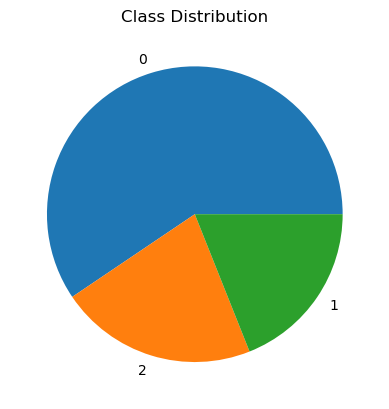

In [14]:
# there is an inbalance class peoblem in the dataset
plt.pie(df['class'].value_counts(), labels=df['class'].value_counts().index)
plt.title("Class Distribution")
plt.show()

<Axes: xlabel='class', ylabel='redshift'>

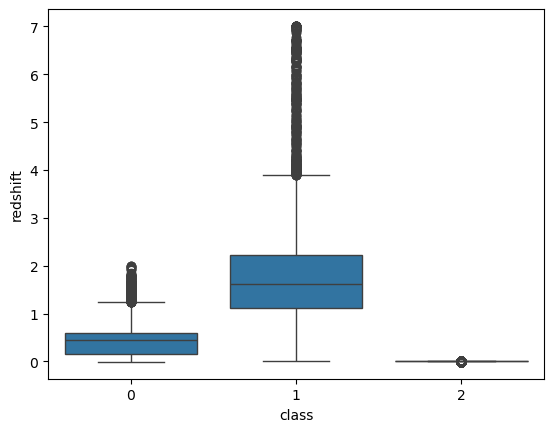

In [15]:
# the redshift is the measurement of how much the light is stretched in space
# the redshift for star(0) is less than galaxy(0), less than QSO(1)
sns.boxplot(x='class', y='redshift', data=df)

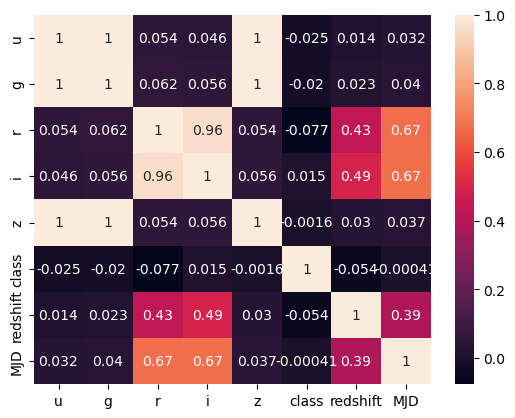

In [16]:
# there are very high correlation between u,g and z
df_corr = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID', 'spec_obj_ID', 'fiber_ID','plate'], axis = 1)
corrmap = df_corr.corr(numeric_only=True)

sns.heatmap(corrmap, annot=True)
plt.show()

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

<Figure size 1100x600 with 0 Axes>

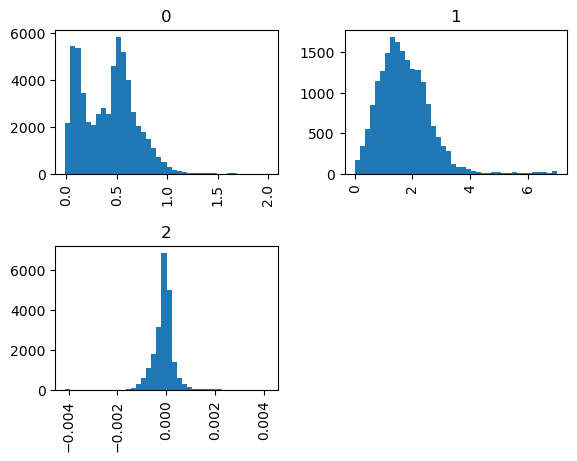

In [17]:
plt.figure(figsize = [11,6])
df.hist(column= 'redshift',by='class',bins = 40)

In [18]:
# drop the unnecessary columns for model training
df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID', 'spec_obj_ID', 'fiber_ID'], axis = 1, inplace=True)


In [19]:
# split the dataset
x = df.drop('class', axis=1)   # Keep X as a DataFrame
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [20]:
# drop rows randamly from x_train and x_test to solve the imbalance class problem
train = x_train.copy()
train['class'] = y_train

galaxy_instances = train[train['class'] == 0]
others = train[train['class'] != 0]

galaxy_instances_reduced = galaxy_instances.sample(n=len(galaxy_instances) - 30281, random_state=42)

train_x = pd.concat([galaxy_instances_reduced, others], axis=0).sample(frac=1, random_state=42)

train_y = train_x['class']
train_x = train_x.drop('class', axis=1)

In [21]:
df.var()

u             1009.287838
g             1008.081063
r                3.440134
i                3.090194
z             1006.675616
class            0.667127
redshift         0.533933
plate      8716095.078277
MJD        3270615.220476
dtype: float64

In [22]:
# drop more columns for the decision tree model
train_x_de= train_x.drop(["u","g","plate"], axis=1)
x_test_de = x_test.drop(["u","g","plate"], axis=1)
x_test_de

,r,i,z,redshift,MJD
33708,20.608030,20.044320,19.867790,-0.000497,55621.000000
64005,21.285610,20.132620,19.295690,0.604732,58054.000000
66535,21.655810,22.053570,21.378430,0.034463,55569.000000
27072,17.737370,17.271010,16.991220,0.141547,52443.000000
26350,19.444580,18.736690,18.274790,0.424649,56069.000000
...,...,...,...,...,...
12211,21.159170,20.207960,19.925230,0.692275,55599.000000
15895,20.609620,19.553970,18.992640,0.537986,56034.000000
81116,20.463120,19.507640,19.163100,0.538055,55686.000000
77737,19.826100,19.049650,18.638930,0.367842,56539.000000


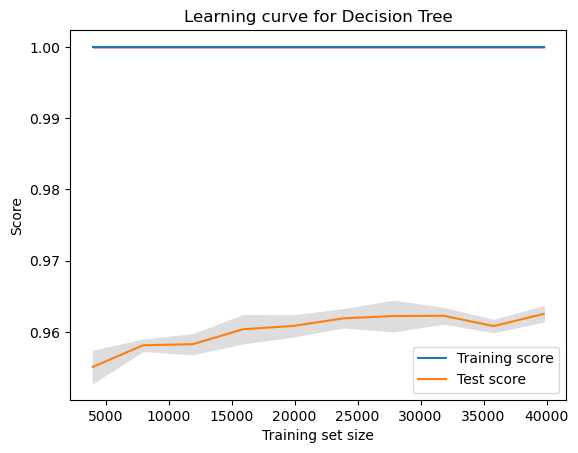

In [55]:
X = train_x
y = train_y

# Create a Decision Tree
t = DecisionTreeClassifier(random_state=42)

# Compute the learning curve with 5-fold cross-validation and 10 train sizes
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    t, X, y, cv=5, train_sizes=np.linspace (0.1, 1.0, 10), return_times=True)

# Compute the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the mean training and test scores as a function of train_sizes
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Test score")

# Fill the area between the mean and the standard deviation of the training and test scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Add labels and title to the plot
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.title("Learning curve for Decision Tree")
plt.legend()
plt.show()

In [24]:
# Decision tree 
d_range=range(2,11)
tr_scores = []
te_scores = []
for d in d_range:
    t= DecisionTreeClassifier(max_depth=d,random_state=42)
    t.fit(train_x_de, train_y)
    tr_scores.append(t.score(train_x_de,train_y))
    te_scores.append(t.score(x_test_de,y_test))

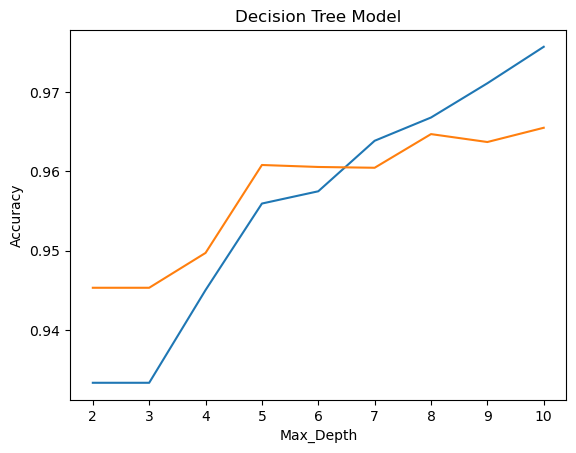

In [25]:
plt.plot(d_range, tr_scores)
plt.plot(d_range, te_scores)
plt.xlabel('Max_Depth')
plt.title("Decision Tree Model")
plt.ylabel('Accuracy')
plt.show()

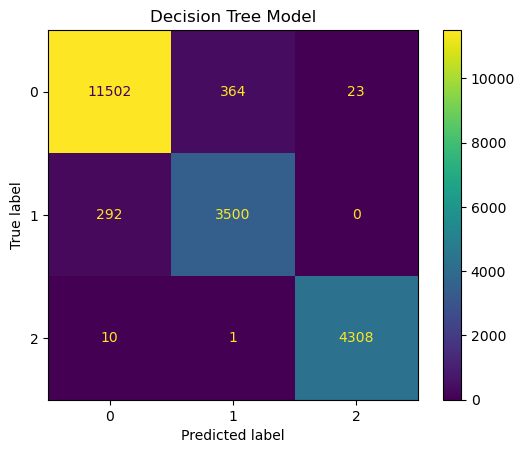

In [26]:
# confusion matrix
y_predect = t.predict(x_test_de)
confusion = confusion_matrix(y_test,y_predect)
cm = ConfusionMatrixDisplay(confusion)
cm.plot()
plt.title("Decision Tree Model")
plt.show()

In [27]:
print(classification_report(y_test,y_predect))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11889
           1       0.91      0.92      0.91      3792
           2       0.99      1.00      1.00      4319

    accuracy                           0.97     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000



In [28]:
precision = []
recall = []
F1_score = []
precision.append(precision_score(y_test,y_predect,average='macro'))
recall.append(recall_score(y_test,y_predect,average='macro'))
F1_score.append(f1_score(y_test,y_predect,average='macro'))

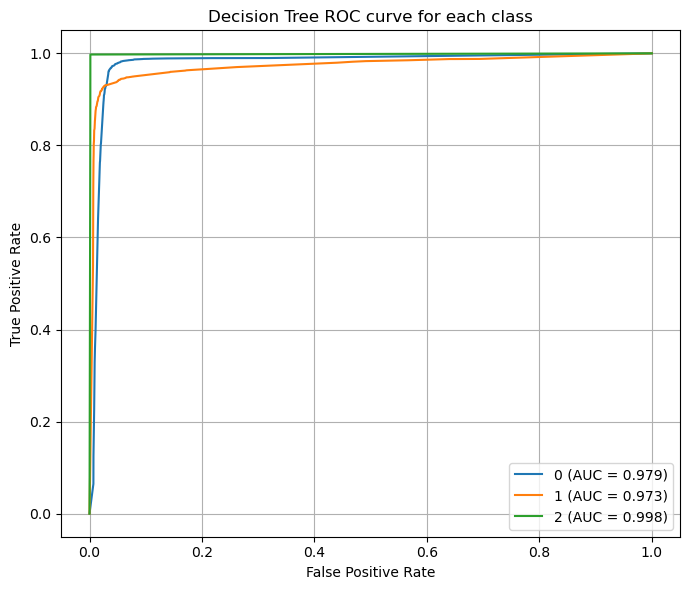

In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_score = t.predict_proba(x_test_de)# get class probabilities

# Binarize y_test to one-vs-rest format
classes = t.classes_            # contains the classes
y_test_bin = label_binarize(y_test, classes=classes)  # Transform the classes into binary columns 

# Plot one ROC curve per class
plt.figure(figsize=(7,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    cls_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{cls} (AUC = {cls_auc:.3f})')



plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve for each class')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()# logistic regrission model without removing any columns

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always

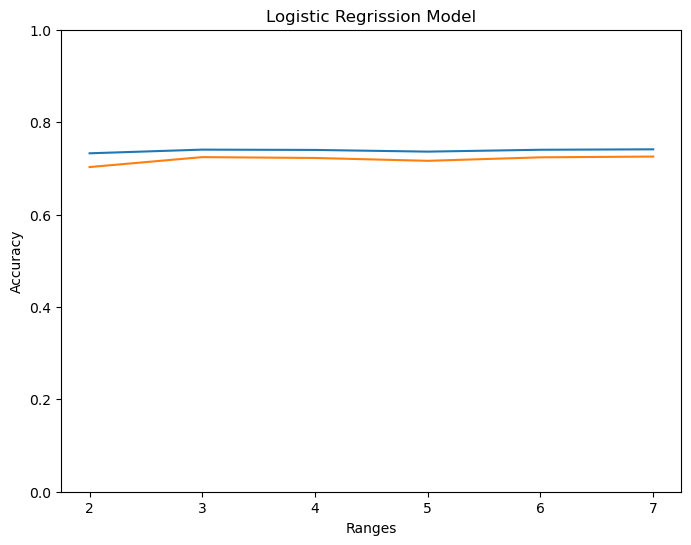

In [30]:
# logistic regrission model without removing any columns
ranges = range(2,8)
tr_scores = []
te_scores = []

for n in ranges:
    log = LogisticRegression(multi_class='multinomial', solver='lbfgs',C=n,random_state=42)
    log.fit(train_x, train_y)
    tr_scores.append(log.score(train_x,train_y))
    te_scores.append(log.score(x_test,y_test))


plt.figure(figsize = (8,6))
plt.plot(ranges,tr_scores)
plt.plot(ranges,te_scores)
plt.title("Logistic Regrission Model")
plt.xlabel("Ranges")
plt.ylabel("Accuracy")
plt.ylim(0,1)

plt.show()

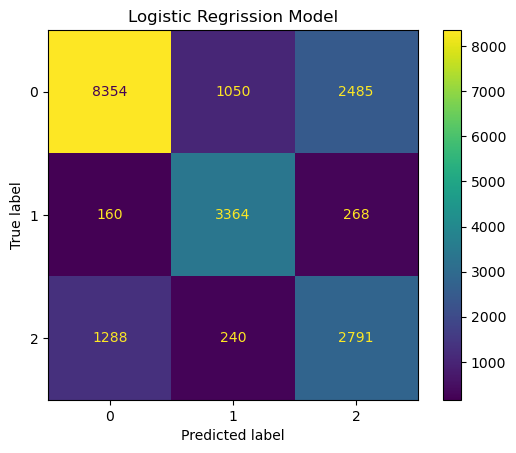

In [31]:
y_predict_log = log.predict(x_test)
confusion = confusion_matrix(y_test,y_predict_log)
cm = ConfusionMatrixDisplay(confusion)
cm.plot()
plt.title("Logistic Regrission Model")
plt.show()

In [32]:
print(classification_report(y_test,y_predict_log))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77     11889
           1       0.72      0.89      0.80      3792
           2       0.50      0.65      0.57      4319

    accuracy                           0.73     20000
   macro avg       0.69      0.75      0.71     20000
weighted avg       0.75      0.73      0.73     20000



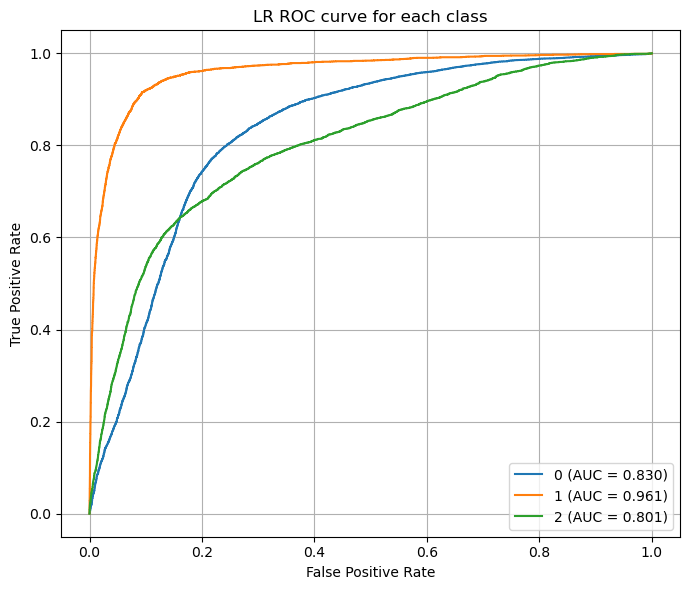

In [33]:
y_score = log.predict_proba(x_test)# get class probabilities

# binarize y_test to each class format
classes = log.classes_            # contains the classes
y_test_bin = label_binarize(y_test, classes=classes)  # Transform the classes into binary columns 

# Plot one ROC curve per class
plt.figure(figsize=(7,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    cls_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{cls} (AUC = {cls_auc:.3f})')



plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')
plt.title('LR ROC curve for each class')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always

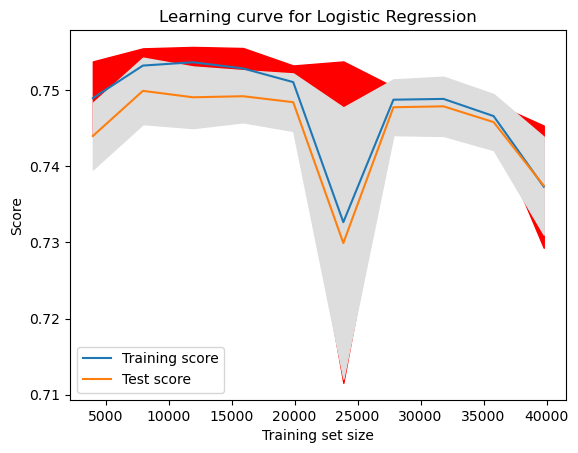

In [52]:
X = train_x
y = train_y

# Create a Logistic Regression
log = LogisticRegression(multi_class='multinomial', solver='lbfgs',C=n,random_state=42)

# Compute the learning curve with 5-fold cross-validation and 10 train sizes
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    log, X, y, cv=5, train_sizes=np.linspace (0.1, 1.0, 10), return_times=True)

# Compute the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the mean training and test scores as a function of train_sizes
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Test score")

# Fill the area between the mean and the standard deviation of the training and test scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Add labels and title to the plot
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.title("Learning curve for Logistic Regression")
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always

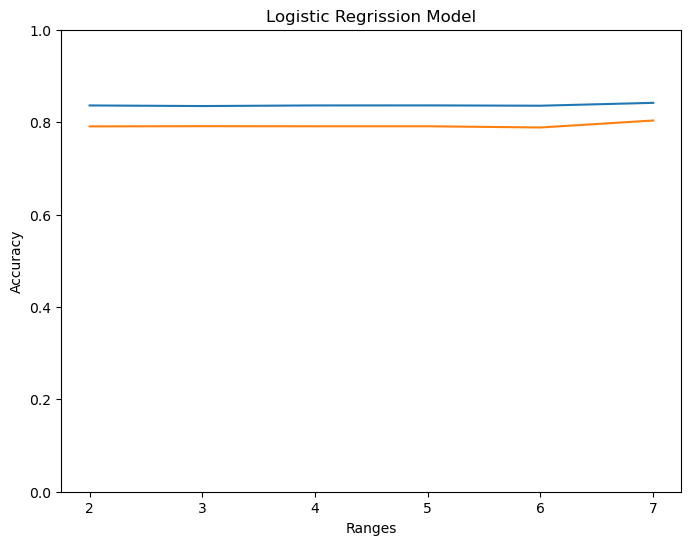

In [34]:
# logistic regrission model with removing some columns
ranges = range(2,8)
tr_scores = []
te_scores = []

for n in ranges:
    log = LogisticRegression(multi_class='multinomial', solver='lbfgs',C=n,random_state=42)
    log.fit(train_x_de, train_y)
    tr_scores.append(log.score(train_x_de,train_y))
    te_scores.append(log.score(x_test_de,y_test))


plt.figure(figsize = (8,6))
plt.plot(ranges,tr_scores)
plt.plot(ranges,te_scores)
plt.title("Logistic Regrission Model")
plt.xlabel("Ranges")
plt.ylabel("Accuracy")
plt.ylim(0,1)

plt.show()

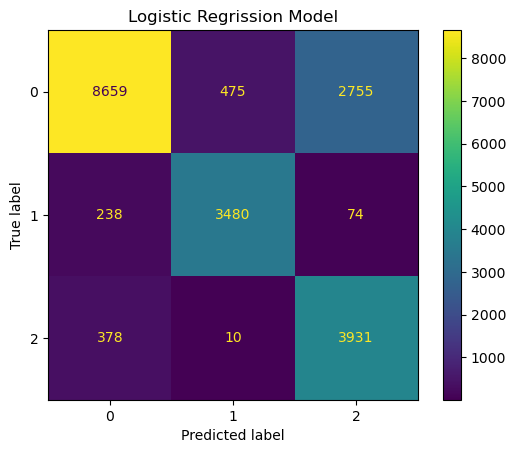

In [35]:
# confusion matrix
y_predict_log = log.predict(x_test_de)
confusion = confusion_matrix(y_test,y_predict_log)
cm = ConfusionMatrixDisplay(confusion)
cm.plot()
plt.title("Logistic Regrission Model")
plt.show()

In [36]:
print(classification_report(y_test,y_predict_log))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82     11889
           1       0.88      0.92      0.90      3792
           2       0.58      0.91      0.71      4319

    accuracy                           0.80     20000
   macro avg       0.80      0.85      0.81     20000
weighted avg       0.85      0.80      0.81     20000



In [37]:
precision.append(precision_score(y_test,y_predict_log,average='macro'))
recall.append(recall_score(y_test,y_predict_log,average='macro'))
F1_score.append(f1_score(y_test,y_predict_log,average='macro'))

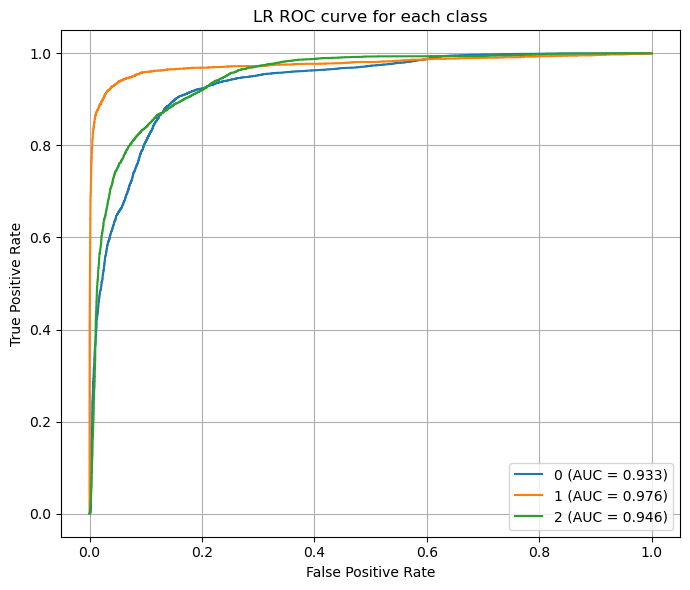

In [38]:
y_score = log.predict_proba(x_test_de)# get class probabilities

# binarize y_test to each class format
classes = log.classes_            # contains the classes
y_test_bin = label_binarize(y_test, classes=classes)  # Transform the classes into binary columns 

# Plot one ROC curve per class
plt.figure(figsize=(7,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    cls_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{cls} (AUC = {cls_auc:.3f})')



plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')
plt.title('LR ROC curve for each class')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

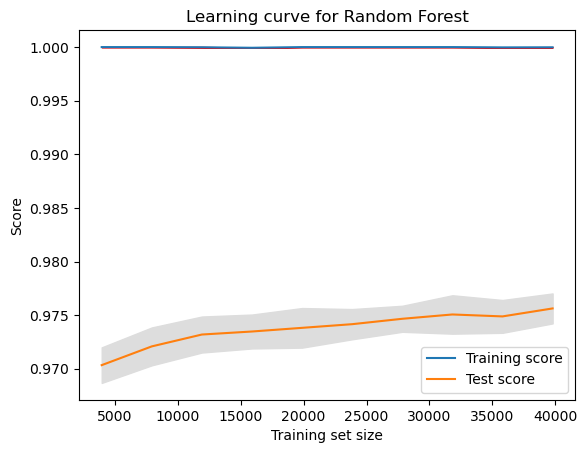

In [56]:
X = train_x
y = train_y

# Create a Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Compute the learning curve with 5-fold cross-validation and 10 train sizes
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    random_forest, X, y, cv=5, train_sizes=np.linspace (0.1, 1.0, 10), return_times=True)

# Compute the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the mean training and test scores as a function of train_sizes
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Test score")

# Fill the area between the mean and the standard deviation of the training and test scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Add labels and title to the plot
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.title("Learning curve for Random Forest")
plt.legend()
plt.show()

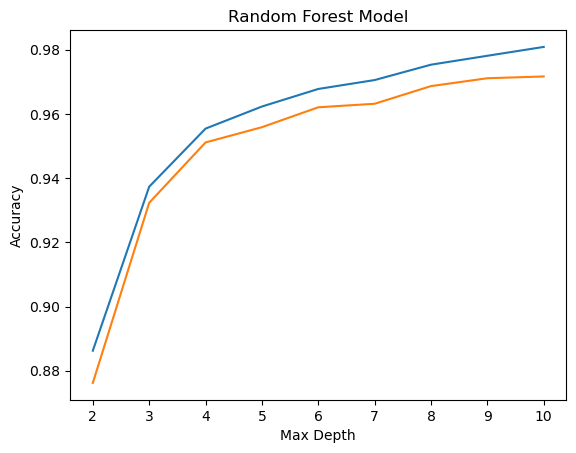

In [39]:
# Random Forest model
ranges = range(2,11)
tr_scores = []
te_scores = []

for s in ranges:
    
    random_forest = RandomForestClassifier(max_depth=s,random_state=42)
    random_forest.fit(train_x,train_y)
    tr_scores.append(random_forest.score(train_x,train_y))
    te_scores.append(random_forest.score(x_test,y_test))

plt.plot(ranges,tr_scores)
plt.plot(ranges,te_scores)
plt.xlabel("Max Depth")
plt.title("Random Forest Model")
plt.ylabel("Accuracy")

plt.show()

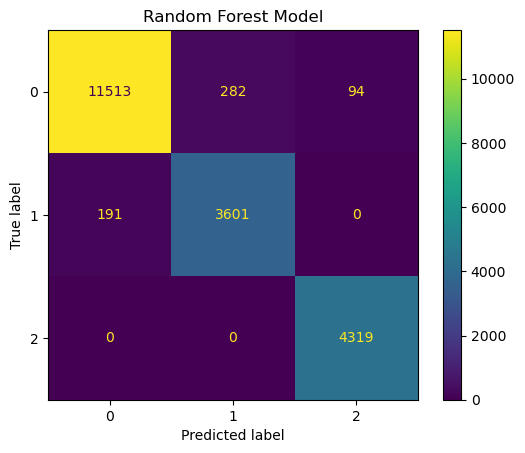

In [40]:
# confusion matrix
y_predect_rand = random_forest.predict(x_test)
confusion = confusion_matrix(y_test,y_predect_rand)
cm = ConfusionMatrixDisplay(confusion)
cm.plot()
plt.title("Random Forest Model")
plt.show()

In [41]:
print(classification_report(y_test, y_predect_rand))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11889
           1       0.93      0.95      0.94      3792
           2       0.98      1.00      0.99      4319

    accuracy                           0.97     20000
   macro avg       0.96      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [42]:
precision.append(precision_score(y_test,y_predect_rand,average='macro'))
recall.append(recall_score(y_test,y_predect_rand,average='macro'))
F1_score.append(f1_score(y_test,y_predect_rand,average='macro'))

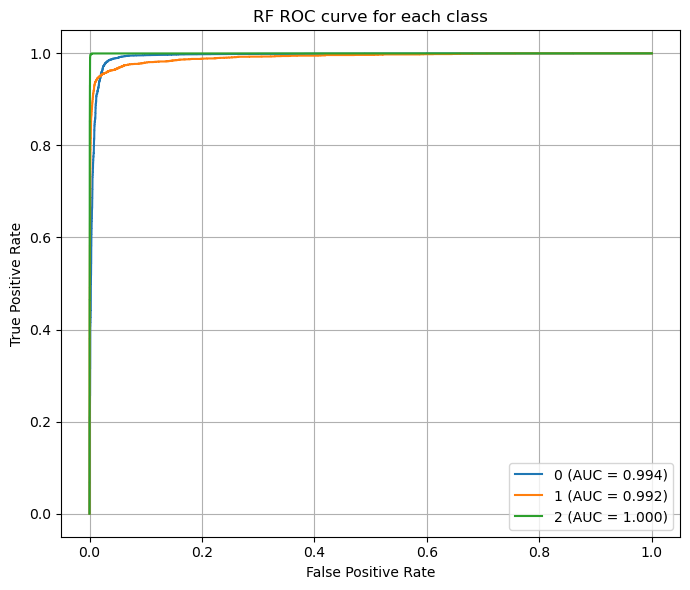

In [43]:
y_score = random_forest.predict_proba(x_test)# get class probabilities

#Binarize y_test to one-vs-rest format
classes = random_forest.classes_            # contains the classes
y_test_bin = label_binarize(y_test, classes=classes)  # Transform the classes into binary columns 

# Plot one ROC curve per class
plt.figure(figsize=(7,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    cls_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{cls} (AUC = {cls_auc:.3f})')


plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')
plt.title('RF ROC curve for each class')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

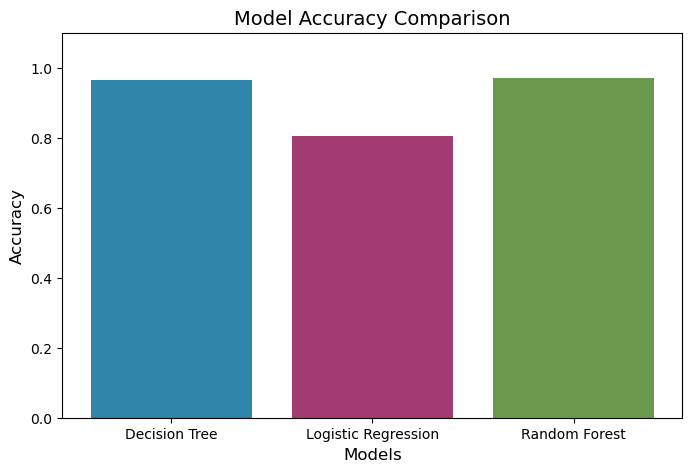

In [44]:
# model accuracy comparison
accuracy = [
    t.score(x_test_de, y_test),
    log.score(x_test_de, y_test),
    random_forest.score(x_test, y_test)
]

model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest']


plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracy, color=['#2E86AB', '#A23B72', '#6A994E'])

plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.ylim(0, 1.1)
plt.show()

In [45]:
precision

[0.9582225477049553, 0.7975911595839502, 0.9632519436094152]

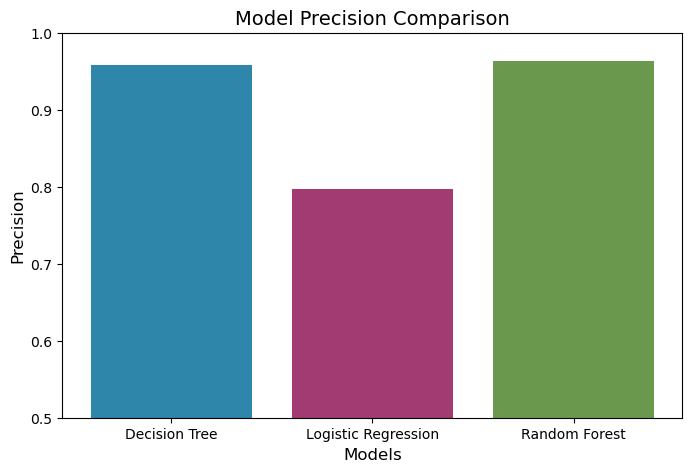

In [46]:
# model precision comparison
plt.figure(figsize=(8, 5))
plt.bar(model_names, precision, color=['#2E86AB', '#A23B72', '#6A994E'])

plt.title("Model Precision Comparison", fontsize=14)
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.ylim(0.5, 1)
plt.show()

In [47]:
recall

[0.9626325990280726, 0.8520687349881374, 0.9726683096774561]

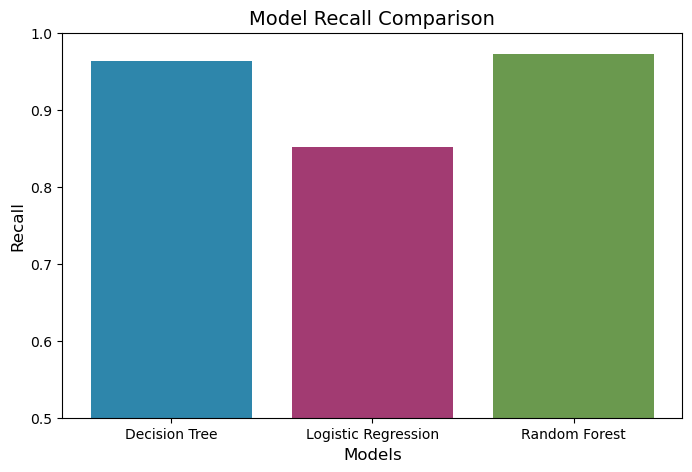

In [48]:
# model recall comparison
plt.figure(figsize=(8, 5))
plt.bar(model_names, recall, color=['#2E86AB', '#A23B72', '#6A994E'])

plt.title("Model Recall Comparison", fontsize=14)
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.ylim(0.5, 1)
plt.show()

In [49]:
F1_score

[0.9603950684854636, 0.8083870814870734, 0.9678579270621054]

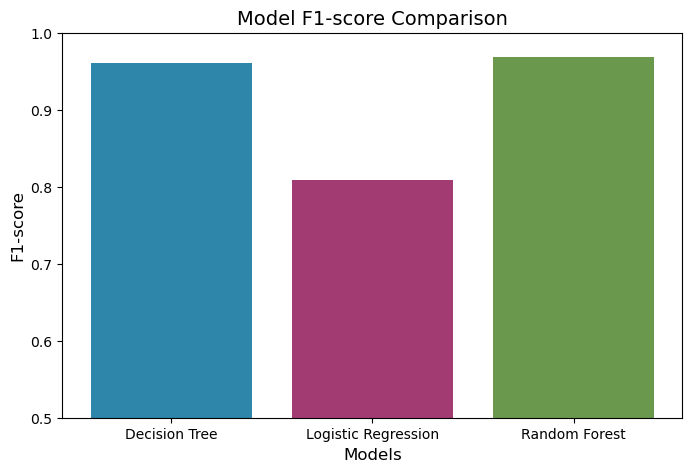

In [50]:
# model F1_Score comparison
plt.figure(figsize=(8, 5))
plt.bar(model_names, F1_score, color=['#2E86AB', '#A23B72', '#6A994E'])

plt.title("Model F1-score Comparison", fontsize=14)
plt.ylabel("F1-score", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.ylim(0.5, 1)
plt.show()